In [112]:
%%javascript
$.getScript('http://120.78.95.32/j_n_contents.js')

<IPython.core.display.Javascript object>

<div id="toc">
</div>

# 3.1

In [1]:
import torch
from time import time

In [27]:
a=torch.ones(1000)
b=torch.ones(1000)

In [7]:
start=time()
c=torch.zeros(1000)
for i in range(1000):
    c[i]=a[i]+b[i]
print(time()-start)

0.017002105712890625


In [8]:
start=time()
d=a+b
print(time()-start)

0.0003921985626220703


In [10]:
a=torch.ones(3)
b=10
print(a+b)

tensor([11., 11., 11.])


# 3.2

In [80]:
from matplotlib import pyplot as plt
import numpy as np
import random


In [97]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
temp=np.random.normal(0,1,(num_examples,num_inputs))

features=torch.from_numpy(temp)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
temp2=np.random.normal(0,0.01,size=labels.size())

labels+=torch.from_numpy(temp2)

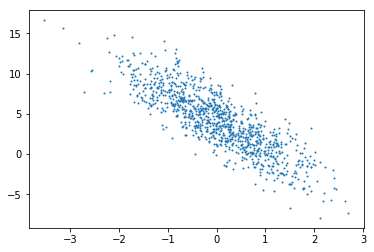

In [98]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [99]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [100]:
batch_size=10
for x,y in data_iter(batch_size,features,labels):
    print(x,y)
    break

tensor([[-0.2780,  0.6538],
        [-1.0189, -0.8133],
        [ 0.3806,  0.0959],
        [-0.5943, -0.5095],
        [ 0.0421,  1.7180],
        [ 2.0435, -0.3125],
        [-0.8074,  1.6154],
        [ 0.6209, -0.2662],
        [-2.4686,  0.3326],
        [ 1.0499,  0.2765]], dtype=torch.float64) tensor([ 1.4120,  4.9064,  4.6238,  4.7536, -1.5493,  9.3473, -2.9154,  6.3557,
        -1.8659,  5.3527], dtype=torch.float64)


In [101]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float64,requires_grad=True)
b=torch.zeros(1,dtype=torch.float64,requires_grad=True)


In [102]:
def linreg(x,w,b):
    return torch.mm(x,w)+b

In [103]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

In [104]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [105]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l=loss(net(x,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print("{},{}".format(epoch,train_l.mean().item()))

0,0.045328929392129395
1,0.0001907204862970872
2,4.934766925897316e-05


# 3.3

In [313]:
num_inputs=2
num_examples=1000
true_w=[[2],[-3.4]]
true_b=4.2
features=torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype=torch.float32)
labels=torch.mm(features,torch.tensor(true_w,dtype=torch.float32))+true_b
labels=labels[:,0]
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

In [296]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [314]:
import torch.utils.data as Data
batch_size=10
dataset=Data.TensorDataset(features,labels)
data_iter=Data.DataLoader(dataset,batch_size,shuffle=True)

In [315]:
for x,y in data_iter:
    print(x,y)
    break

tensor([[ 0.4560,  0.1014],
        [-1.5164, -0.1571],
        [ 0.5458, -0.2416],
        [-0.4951, -0.3011],
        [ 0.1541, -1.6498],
        [ 0.3677,  0.9581],
        [-0.1915,  0.0939],
        [-1.3648,  0.3259],
        [-0.1381,  0.8094],
        [-1.2343, -1.0563]]) tensor([ 4.7667,  1.7084,  6.1097,  4.2198, 10.1128,  1.6758,  3.4820,  0.3587,
         1.1661,  5.3368])


In [316]:
from torch import nn

In [317]:
class LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(LinearNet,self).__init__()
        self.linear=nn.Linear(n_feature,1)
    def forward(self,x):
        y=self.linear(x)
        return y
net=LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [318]:
#Way 1
net=nn.Sequential(
    nn.Linear(num_inputs,1)
)
#Way 2
net=nn.Sequential()
net.add_module('linear',nn.Linear(num_inputs,1))
#Way 3
from collections import OrderedDict
net=nn.Sequential(OrderedDict([('linear',nn.Linear(num_inputs,1))]))

In [319]:
print(net)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [320]:
print(net[0])

Linear(in_features=2, out_features=1, bias=True)


In [321]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.1759, -0.4166]], requires_grad=True)
Parameter containing:
tensor([-0.5774], requires_grad=True)


In [322]:
from torch.nn import init
init.normal_(net[0].weight,mean=0,std=0.01)
init.constant_(net[0].bias,val=0)


Parameter containing:
tensor([0.], requires_grad=True)

In [323]:
loss=nn.MSELoss()

In [324]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [325]:
#for param_group in optimizer.param_groups:
#    param_group['lr']*=0.1

In [326]:
#单独设置学习率
#optimizer=torch.optim.SGD([{'params':net[0].weight,'lr':0.02},
#                           {'params':net[0].bias,'lr':0.03}])

In [327]:
num_epochs=3
for epoch in range(1,num_epochs+1):
    for x,y in data_iter:
        output=net(x)
        l=loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch {},loss {}'.format(epoch,l.item()))

epoch 1,loss 0.00027169068926014006
epoch 2,loss 0.0001391929981764406
epoch 3,loss 7.317453128052875e-05


In [328]:
print(true_w,net[0].weight)

[[2], [-3.4]] Parameter containing:
tensor([[ 1.9997, -3.3999]], requires_grad=True)


In [329]:
print(true_b,net[0].bias)

4.2 Parameter containing:
tensor([4.2005], requires_grad=True)


# 3.5

In [351]:
import torchvision
import torchvision.transforms as transforms
import time
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

In [333]:
mnist_train = torchvision.datasets.FashionMNIST(root='../Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='../Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [334]:
print(type(mnist_train))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [335]:
print(len(mnist_train),len(mnist_test))

60000 10000


In [338]:
feature,label=mnist_train[0]
print(feature.shape,label)

torch.Size([1, 28, 28]) tensor(9)


In [380]:
def get_fashion_mnist_labels(labels):
    t=['T-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [t[int(i)] for i in labels]

In [403]:
def show_fashion_mnist(images,labels):
    _,figs=plt.subplots(1,len(images),figsize=(12,12))
    for f,img,t in zip(figs,images,labels):
        f.imshow(img.view(28,28).numpy())
        f.set_title(t)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

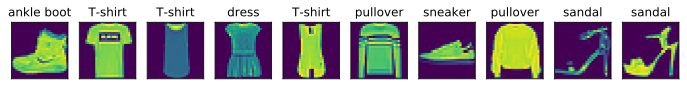

In [404]:
x,y=[],[]
for i in range(10):
    x.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(x,get_fashion_mnist_labels(y))

In [439]:
batch_size=256
train_iter=torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=8)
test_iter=torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=8)


In [442]:
strat=time.time()
for x,y in train_iter:
    continue
print('%.2f sec'%(time.time()-strat))

1.98 sec


# 3.6

In [541]:
import torch
import torchvision
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

In [542]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [543]:
num_inputs=784
num_outputs=10
w=torch.tensor(np.random.normal(0,0.01,size=(num_inputs,num_outputs)),dtype=torch.float32,requires_grad=True)
b=torch.zeros(num_outputs,dtype=torch.float32,requires_grad=True)         

In [544]:
x=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float)
print(x.sum(dim=0,keepdim=True))
print(x.sum(dim=1,keepdim=True))

tensor([[5., 7., 9.]])
tensor([[ 6.],
        [15.]])


In [545]:
def softmax(x):
    x_e=x.exp()
    return x_e/x_e.sum(dim=1,keepdim=True)
    

In [546]:
x=torch.rand((2,5))
x_prob=softmax(x)
print(x_prob,x_prob.sum(dim=1))

tensor([[0.2470, 0.2280, 0.1422, 0.1924, 0.1904],
        [0.2303, 0.2118, 0.1683, 0.1730, 0.2165]]) tensor([1.0000, 1.0000])


In [547]:
def net(x):
    return softmax(torch.mm(x.view(-1,num_inputs),w)+b)


In [548]:
y_hat=torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y=torch.LongTensor([0,2])
y_hat.gather(1,y.view(-1,1))

tensor([[0.1000],
        [0.5000]])

In [549]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat.gather(1,y.view(-1,1)))

In [550]:
def accuracy(y_hat,y):
    return(y_hat.argmax(dim=1)==y).float().mean().item()

In [551]:
print(accuracy(y_hat,y))

0.5


In [552]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for x,y in data_iter:
        acc_sum+=(net(x).argmax(dim=1)==y).float().sum().item()
        n+=y.shape[0]
        return acc_sum/n

In [553]:
print(evaluate_accuracy(test_iter,net))

0.0234375


In [554]:
num_epochs,lr=5,0.1
def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,
             params=None,lr=None,optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for x,y in train_iter:
            y_hat=net(x)
            l=loss(y_hat,y).sum()
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                d2l.sgd(params,lr,batch_size)
            else:
                optimizer.step()
            train_l_sum+=l.item()
            train_acc_sum+=(y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        test_acc=evaluate_accuracy(test_iter,net)
        print("epoch {},loss {},acc {},test acc {}".format(epoch+1,
                                    train_l_sum/n,train_acc_sum/n,test_acc))
        

        
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,batch_size,[w,b],lr)

epoch 1,loss 0.7870237428665161,acc 0.7484166666666666,test acc 0.7734375
epoch 2,loss 0.5705404769897461,acc 0.8133333333333334,test acc 0.81640625
epoch 3,loss 0.5262664638519287,acc 0.8255,test acc 0.8359375
epoch 4,loss 0.5008912105560303,acc 0.8317833333333333,test acc 0.8515625
epoch 5,loss 0.4854903376261393,acc 0.8363333333333334,test acc 0.83984375


In [511]:
x,y=iter(test_iter).next()
true_labels=d2l.get_fashion_mnist_labels(y.numpy())
pred_labels=d2l.get_fashion_mnist_labels(net(x).argmax(dim=1).numpy())

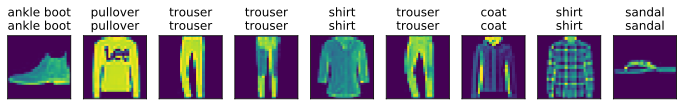

In [520]:
titles = [i+ '\n' + j for i, j in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(x[0:9],titles[0:9])

# 3.7

In [521]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

In [522]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [525]:
num_inpus=784
num_outputs=10
class linearnet(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(linearnet,self).__init__()
        self.linear=nn.Linear(num_inpus,num_outputs)
    def forward(self,x):
        y=self.linear(x.view(x.shape[0],-1))
        return y
net=linearnet(num_inpus,num_outputs)

In [529]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer,self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)

In [530]:
from collections import OrderedDict
net=nn.Sequential(OrderedDict([
    ('flatten',FlattenLayer()),
    ('linear',nn.Linear(num_inputs,1))
]))

In [532]:
init.normal_(net.linear.weight,mean=0,std=0.01)
init.constant_(net.linear.bias,val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [533]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.1)

In [555]:
num_epoch=5

train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,[w,b],lr)

epoch 1,loss 0.0066734737535317735,acc 0.84215,test acc 0.84765625
epoch 2,loss 0.006669836376110713,acc 0.84205,test acc 0.84765625
epoch 3,loss 0.006667837125062943,acc 0.8415333333333334,test acc 0.8515625
epoch 4,loss 0.006665604778130849,acc 0.84065,test acc 0.8515625
epoch 5,loss 0.006664405570427577,acc 0.8403833333333334,test acc 0.85546875


# 3.8

In [556]:
import torch
import numpy as np
import matplotlib.pyplot as plt
def xyplot(x_vals,y_vals,name):
    plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    plt.ylabel(name+'(x)')

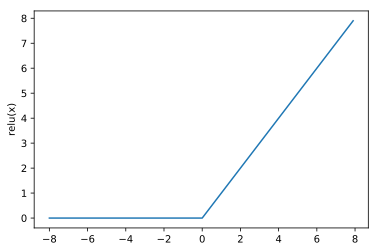

In [557]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=x.relu()
xyplot(x,y,'relu')

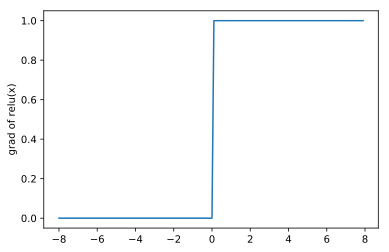

In [558]:
y.sum().backward()
xyplot(x,x.grad,'grad of relu')

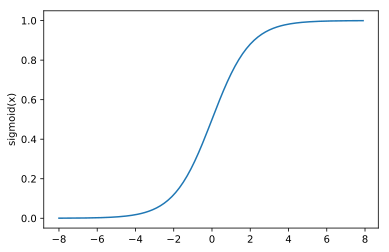

In [559]:
y=x.sigmoid()
xyplot(x,y,'sigmoid')

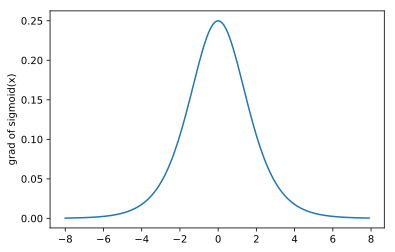

In [560]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

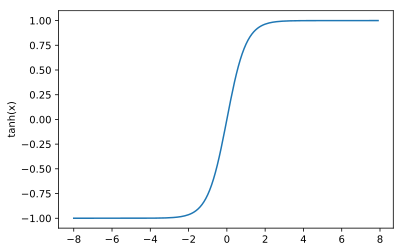

In [561]:
y=x.tanh()
xyplot(x,y,'tanh')

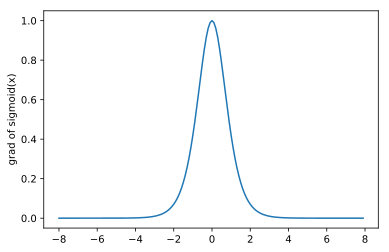

In [562]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of sigmoid')

# 3.9

In [563]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [580]:
num_inputs,num_outputs,num_hiddens=784,10,256
w1=torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hiddens)),dtype=torch.float)
b1=torch.zeros(num_hiddens,dtype=torch.float)
w2=torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)),dtype=torch.float)
b2=torch.zeros(num_outputs,dtype=torch.float)

In [581]:
params=[w1,b1,w2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [566]:
def relu(x):
    return torch.max(input=x,other=torch.tensor(0.0))

In [570]:
def net(x):
    x=x.view(-1,num_inputs)
    H=relu(torch.matmul(x,w1)+b1)
    return torch.matmul(H,w2)+b2

In [568]:
loss=torch.nn.CrossEntropyLoss()

In [571]:
num_epochs,lr=5,100.0

train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch 1,loss 0.0031250672976175942,acc 0.7102666666666667,test acc 0.80078125
epoch 2,loss 0.001919232534368833,acc 0.8210166666666666,test acc 0.8125
epoch 3,loss 0.0016816070785125098,acc 0.8419833333333333,test acc 0.859375
epoch 4,loss 0.0015428600683808327,acc 0.8549166666666667,test acc 0.8671875
epoch 5,loss 0.0014579707697033883,acc 0.8630666666666666,test acc 0.796875


# 3.10

In [573]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [576]:
num_inputs,num_outputs,num_hiddens=784,10,256
net=nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inpus,num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs),
)
for params in net.parameters():
    init.normal_(params,mean=0,std=0.01)

In [586]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            
            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step()  # “softmax回归的简洁实现”一节将用到
            
            
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))



In [587]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)
num_epochs=5

train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)

epoch 1, loss 0.0031, train acc 0.700, test acc 0.762
epoch 2, loss 0.0019, train acc 0.820, test acc 0.867
epoch 3, loss 0.0016, train acc 0.845, test acc 0.871
epoch 4, loss 0.0015, train acc 0.855, test acc 0.848
epoch 5, loss 0.0014, train acc 0.863, test acc 0.848


# 3.11

In [590]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=torch.randn((n_train+n_test,1))

In [594]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=torch.randn((n_train+n_test,1))
poly_features=torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1)
labels=(true_w[0]*poly_features[:,0]+true_w[1]*poly_features[:,-1]
       +true_w[2]*poly_features[:,2]+true_b)
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [595]:
features[:2],poly_features[:2],labels[:2]

(tensor([[ 0.2169],
         [-0.4711]]), tensor([[ 0.2169,  0.0471,  0.0102],
         [-0.4711,  0.2219, -0.1045]]), tensor([5.2836, 4.1980]))

In [600]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,
            legend=None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals,linestyle=":")
        d2l.plt.legend(legend)

In [601]:
num_epochs,loss=100,torch.nn.MSELoss()
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=torch.nn.Linear(train_features.shape[-1],1)
    batch_size=min(10,train_labels.shape[0])
    dataset=torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    
    optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls=[],[]
    
    for _ in range(num_epochs):
        for x,y in train_iter:
            l=loss(net(x),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels=train_labels.view(-1,1)
        test_labels=test_labels.view(-1,1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('finala epoch: train loss {} test loss {}'.format(train_ls[-1],test_ls[-1]))
    
    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
            range(1,num_epochs+1),test_ls,['train','test'])
    print('weight:', net.weight.data,
         '\nbias:',net.bias.data)

finala epoch: train loss 0.00010466897947480902 test loss 7.691891369177029e-05
weight: tensor([[ 1.1986e+00, -1.1708e-03,  2.1995e+00]]) 
bias: tensor([5.0006])


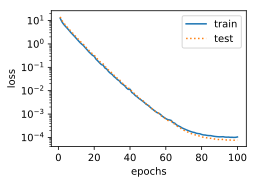

In [602]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],
            labels[:n_train],labels[n_train:])

finala epoch: train loss 17.008832931518555 test loss 12.019944190979004
weight: tensor([[7.0739]]) 
bias: tensor([5.4667])


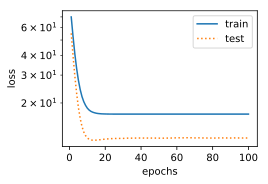

In [603]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],
            labels[n_train:])

finala epoch: train loss 0.8519274592399597 test loss 63.019020080566406
weight: tensor([[-0.1332,  0.7427, -0.3144]]) 
bias: tensor([3.9760])


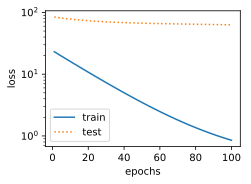

In [604]:
fit_and_plot(poly_features[0:2,:],poly_features[n_train:,:],
            labels[0:2],labels[n_train:])

# 3.12

In [605]:
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

In [607]:
n_train,n_test,num_inputs=20,100,200
true_w,true_b=torch.ones(num_inputs,1)*0.01,0.05
features=torch.randn((n_train+n_test,num_inputs))
labels=torch.matmul(features,true_w)+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features,test_features=features[:n_train,:],features[n_train:,:]
train_labels,test_labels=labels[:n_train],labels[n_train:]

In [608]:
def init_params():
    w=torch.randn((num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]

In [609]:
def l2_penalty(w):
    return (w**2).sum()/2

In [611]:
batch_size,num_epochs,lr=1,100,0.003
net,loss=d2l.linreg,d2l.squared_loss

In [612]:
dataset=torch.utils.data.TensorDataset(train_features,train_labels)
train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

In [621]:
def fit_and_plot(lambd):
    w,b=init_params()
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for x,y in train_iter:
            l=loss(net(x,w,b),y)+lambd*l2_penalty(w)
            l=l.sum()
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().item())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                     range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

In [617]:
def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            # 添加了L2范数惩罚项
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 12.15108585357666


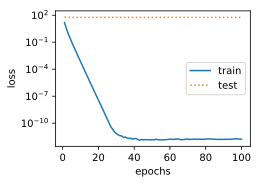

In [622]:
fit_and_plot(lambd=0)

L2 norm of w: 0.0425378642976284


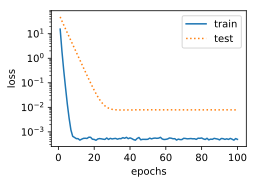

In [623]:
fit_and_plot(lambd=3)

In [629]:
def fit_and_plot_pytorch(wd):
    net=nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    optimizer_w=torch.optim.SGD(params=[net.weight],lr=lr,weight_decay=wd)
    optimizer_b=torch.optim.SGD(params=[net.bias],lr=lr)
    
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for x,y in train_iter:
            l=loss(net(x),y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features),train_labels).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())
        
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
                range(1,num_epochs+1),test_ls,['train','test'])
    print("l2 norm of w:{}".format(net.weight.data.norm().item()))

l2 norm of w:13.696361541748047


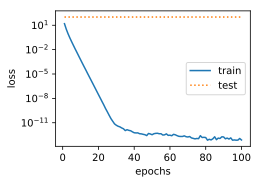

In [630]:
fit_and_plot_pytorch(0)

l2 norm of w:0.07282624393701553


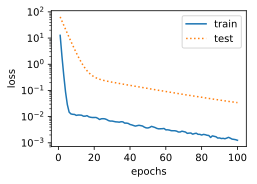

In [631]:
fit_and_plot_pytorch(3)

# 3.13

In [729]:
def dropout(x,prob,device=torch.device("cuda")):
    x=x.float()
    assert 0<=prob<=1
    if prob==0:
        return torch.zeros_like(x)
    mask=(torch.randn(x.shape)<prob).float()
    mask=mask.to(device)
    return mask*x/prob

In [691]:
x=torch.arange(16).view(2,8)
dropout(x,0)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [692]:
x

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [693]:
dropout(x,0.5)

tensor([[1., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 0., 1., 1.]])
cpu


tensor([[ 0.,  0.,  4.,  6.,  8., 10., 12., 14.],
        [ 0.,  0., 20., 22., 24.,  0., 28., 30.]])

In [649]:
dropout(x,0.8)

tensor([[0., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 0.]])


tensor([[ 0.0000,  1.2500,  2.5000,  3.7500,  5.0000,  6.2500,  7.5000,  8.7500],
        [10.0000, 11.2500, 12.5000, 13.7500, 15.0000, 16.2500,  0.0000,  0.0000]])

In [650]:
dropout(x,1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 0., 1., 1.]])


tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 0.,  9., 10., 11., 12.,  0., 14., 15.]])

In [730]:
def init_n(m,v,i,o,device=torch.device("cuda")):
    return torch.tensor(np.random.normal(m,v,(i,o)),dtype=torch.float,requires_grad=True,device=device)
def init_z(i,device=torch.device("cuda")):
    return torch.zeros(i,dtype=torch.float,requires_grad=True,device=device)

In [731]:
num_inputs,num_outputs,num_hiddens1,num_hiddens2=784,10,256,256
w1=init_n(0,0.01,num_inputs,num_hiddens1)
b1=init_z(num_hiddens1)
w2=init_n(0,0.01,num_hiddens1,num_hiddens2)
b2=init_z(num_hiddens2)
w3=init_n(0,0.01,num_hiddens2,num_outputs)
b3=init_z(num_outputs)
params=[w1,b1,w2,b2,w3,b3]

In [735]:
prob1,prob2=0.2,0.5
def net(x,is_training=True):
    x=x.view(-1,num_inputs)
    h1=(torch.matmul(x,w1)+b1).relu()
    if is_training:
        h1=dropout(h1,prob1)
    h2=(torch.matmul(h1,w2)+b2).relu()
    if is_training:
        h2=dropout(h2,prob2)
    return torch.matmul(h2,w3)+b3

In [736]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for x,y in data_iter:
        if isinstance(net,torch.nn.Module):
            net.eval()
            acc_sum+=(net(x).argmax(dim=1)==y).float().sum().item()
            net.train()
        else:
            if('is_training' in net.__code__.covarnames):
                acc_sum+=(net(x,is_training=False).argmax(dim=1)==y).float().sum().item()
            else:
                acc_sum+=(net(x).argmax(dim=1)==y).float().sum().item()
        n+=y.shape[0]
    return acc_sum/n

In [737]:
num_epochs,lr,batch_size=5,100.0,256
loss=torch.nn.CrossEntropyLoss()
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/wrjs/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
   

epoch 1, loss 0.0033, train acc 0.674, test acc 0.444


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/wrjs/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
   

epoch 2, loss 0.0030, train acc 0.708, test acc 0.401


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/wrjs/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
   

epoch 3, loss 0.0028, train acc 0.724, test acc 0.325


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/wrjs/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
Exc

epoch 4, loss 0.0028, train acc 0.718, test acc 0.407


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/wrjs/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f98dd9582f0>
Traceback (most recent call last):
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/wrjs/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
   

epoch 5, loss 0.0027, train acc 0.726, test acc 0.418


In [738]:
net=nn.Sequential(
    d2l.FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens1),
    nn.ReLU(),
    nn.Dropout(prob1),
    nn.Linear(num_hiddens1,num_hiddens2),
    nn.ReLU(),
    nn.Dropout(prob2),
    nn.Linear(num_hiddens2,num_outputs)
)
for param in net.parameters():
    nn.init.normal_(param,mean=0,std=0.01)


In [741]:
net.to(torch.device("cuda"))

Sequential(
  (0): FlattenLayer()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

In [742]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)

epoch 1, loss 0.0050, train acc 0.517, test acc 0.704
epoch 2, loss 0.0024, train acc 0.775, test acc 0.796
epoch 3, loss 0.0020, train acc 0.817, test acc 0.815
epoch 4, loss 0.0018, train acc 0.832, test acc 0.803
epoch 5, loss 0.0017, train acc 0.840, test acc 0.829


# 3.16

In [743]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
torch.set_default_tensor_type(torch.FloatTensor)

In [744]:
train_data=pd.read_csv('../../data/kaggle_house/train.csv')
test_data=pd.read_csv('../../data/kaggle_house/test.csv')


In [746]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [748]:
train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [749]:
all_features=pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:-1]))

/home/wrjs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [750]:
all_features.shape

(2919, 79)

In [753]:
numeric_features=all_features.dtypes[all_features.dtypes!="object"].index

In [758]:
all_features[numeric_features]=all_features[numeric_features].apply(
lambda x: (x-x.mean())/(x.std()))
all_features=all_features.fillna(0)

In [759]:
all_features.

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.773728,1.207172,-0.103313,0,0.169898,1Fam,TA,No,0.580708,-0.293030,...,WD,-0.285886,Pave,0.986680,-0.444176,AllPub,-0.740634,1.046078,0.896679,0.157619
1,0.261030,-0.784891,-0.103313,0,0.169898,1Fam,TA,Gd,1.177709,-0.293030,...,WD,-0.285886,Pave,-0.287709,0.476948,AllPub,1.614603,0.154737,-0.395536,-0.602858
2,-0.610614,1.235163,-0.103313,0,0.169898,1Fam,TA,Mn,0.097840,-0.293030,...,WD,-0.285886,Pave,-0.287709,-0.298974,AllPub,-0.740634,0.980053,0.848819,0.157619
3,-0.506118,0.978574,-0.103313,0,0.169898,1Fam,Gd,No,-0.494771,-0.293030,...,WD,-0.285886,Pave,0.349486,-0.671053,AllPub,-0.740634,-1.859033,-0.682695,-1.363335
4,-0.037164,1.671364,-0.103313,0,1.385418,1Fam,TA,Av,0.468770,-0.293030,...,WD,-0.285886,Pave,1.623875,0.211501,AllPub,0.776834,0.947040,0.753100,0.157619
5,-0.926648,0.535376,12.601064,0,-2.261142,1Fam,TA,No,0.637774,-0.293030,...,WD,-0.285886,Pave,-0.924904,-0.580302,AllPub,-0.424494,0.715952,0.513801,0.918095
6,1.362054,-0.784891,-0.103313,0,0.169898,1Fam,TA,Av,2.035897,-0.293030,...,WD,-0.285886,Pave,0.349486,1.438909,AllPub,1.274753,1.079091,0.992399,-0.602858
7,-0.134013,1.508080,-0.103313,0,0.169898,1Fam,TA,Mn,0.916521,-0.103911,...,WD,-0.285886,Pave,0.349486,0.125287,AllPub,1.116684,0.055700,-0.539116,0.918095
8,-0.350650,0.969244,-0.103313,0,-1.045622,1Fam,TA,No,-0.968860,-0.293030,...,WD,-0.285886,Pave,0.986680,-0.226373,AllPub,-0.029321,-1.330831,-1.639892,0.157619
9,-0.210473,-0.784891,-0.103313,0,-1.045622,2fmCon,TA,No,0.898962,-0.293030,...,WD,-0.285886,Pave,-0.924904,-0.137891,AllPub,-0.740634,-1.066730,-1.639892,0.157619


In [760]:
all_features=pd.get_dummies(all_features,dummy_na=True)


In [761]:
all_features

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Oth,SaleType_WD,SaleType_nan,Street_Grvl,Street_Pave,Street_nan,Utilities_0,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan
0,-0.773728,1.207172,-0.103313,0.169898,0.580708,-0.293030,1.086464,-0.249767,-0.934542,-0.359539,...,0,1,0,0,1,0,0,1,0,0
1,0.261030,-0.784891,-0.103313,0.169898,1.177709,-0.293030,-0.819258,3.820454,-0.629681,-0.359539,...,0,1,0,0,1,0,0,1,0,0
2,-0.610614,1.235163,-0.103313,0.169898,0.097840,-0.293030,1.086464,-0.249767,-0.288418,-0.359539,...,0,1,0,0,1,0,0,1,0,0
3,-0.506118,0.978574,-0.103313,0.169898,-0.494771,-0.293030,1.086464,-0.249767,-0.047258,3.874303,...,0,1,0,0,1,0,0,1,0,0
4,-0.037164,1.671364,-0.103313,1.385418,0.468770,-0.293030,1.086464,-0.249767,-0.161013,-0.359539,...,0,1,0,0,1,0,0,1,0,0
5,-0.926648,0.535376,12.601064,-2.261142,0.637774,-0.293030,1.086464,-0.249767,-1.130200,-0.359539,...,0,1,0,0,1,0,0,1,0,0
6,1.362054,-0.784891,-0.103313,0.169898,2.035897,-0.293030,1.086464,-0.249767,-0.554603,-0.359539,...,0,1,0,0,1,0,0,1,0,0
7,-0.134013,1.508080,-0.103313,0.169898,0.916521,-0.103911,1.086464,-0.249767,-0.784386,3.189417,...,0,1,0,0,1,0,0,1,0,0
8,-0.350650,0.969244,-0.103313,-1.045622,-0.968860,-0.293030,-0.819258,-0.249767,0.890077,2.831408,...,0,1,0,0,1,0,0,1,0,0
9,-0.210473,-0.784891,-0.103313,-1.045622,0.898962,-0.293030,1.086464,-0.249767,-0.957293,-0.359539,...,0,1,0,0,1,0,0,1,0,0


In [762]:
all_features.shape

(2919, 355)

In [765]:
n_train=train_data.shape[0]
train_features=torch.tensor(all_features[:n_train].values,dtype=torch.float)
test_features=torch.tensor(all_features[n_train:].values,dtype=torch.float)
train_labels=torch.tensor(train_data.SalePrice.values,dtype=torch.float).view(-1,1)


In [766]:
loss=torch.nn.MSELoss()
def get_net(feature_num):
    net=nn.Linear(feature_num,1)
    for param in net.parameters():
        nn.init.normal_(param,mean=0,std=0.01)
    return net

In [767]:
def log_rmse(net,features,labels):
    with torch.no_grad():
        clipped_preds=torch.max(net(features),torch.tensor(1.0))
        rmse=torch.sqrt(2*loss(clipped_preds.log(),labels.log()).mean())
    return rmse.item()

In [787]:
def train(net,train_features,train_labels,test_features,test_labels,num_epochs,
         learning_rate,weight_decay,batch_size):
    train_ls,test_ls=[],[]
    dataset=torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    optimizer=torch.optim.Adam(params=net.parameters(),lr=learning_rate,
                              weight_decay=weight_decay)
    net=net.float()
    for epoch in range(num_epochs):
        for x,y in train_iter:
            l=loss(net(x.float()),y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net,test_features,test_labels))
    return train_ls,test_ls

In [788]:
def get_k_fold_data(k,i,x,y):
    assert k>1
    fold_size=x.shape[0]//k
    x_train,y_train=None,None
    for j in range(k):
        idx=slice(j*fold_size,(j+1)*fold_size)
        x_part,y_part=x[idx,:],y[idx]
        if j==i:
            x_valid,y_valid=x_part,y_part
        elif x_train is None:
            x_train,y_train=x_part,y_part
        else:
            x_train=torch.cat((x_train,x_part),dim=0)
            y_train=torch.cat((y_train,y_part),dim=0)
    return x_train,y_train,x_valid,y_valid


In [774]:
a=[3,5,6]

In [776]:
print(*a)

3 5 6


In [793]:
def k_fold(k,x_train,y_train,num_epochs,learning_rate,weight_decay,batch_size):
    train_l_sum,valid_l_sum=0,0
    for i in range(k):
        data=get_k_fold_data(k,i,x_train,y_train)
        net=get_net(x_train.shape[1])
        train_ls,valid_ls=train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        train_l_sum+=train_ls[-1]
        valid_l_sum+=valid_ls[-1]
        if i==0:
            d2l.semilogy(range(1,num_epochs+1),train_ls,'epochs','rmse',
                        range(1,num_epochs+1)), valid_ls,['train','valid']
        print("fold{},train rmse valid rmse {}{}".format(i,train_ls[-1],valid_ls[-1]))
    return train_l_sum/k,valid_l_sum/k

fold0,train rmse valid rmse 0.240706980228424070.22239643335342407
fold1,train rmse valid rmse 0.230140894651412960.2666178047657013
fold2,train rmse valid rmse 0.231640607118606570.23757296800613403
fold3,train rmse valid rmse 0.237476110458374020.2191087156534195
fold4,train rmse valid rmse 0.231364786624908450.259196400642395


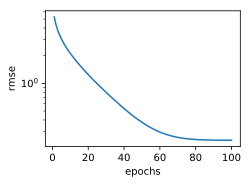

In [794]:
k,num_epochs,lr,weight_decay,batch_size=5,100,5,0,64
train_l,valid_l=k_fold(k,train_features,train_labels,num_epochs,lr,weight_decay,batch_size)

In [795]:
print("train:{}; valid:{}".format(train_l,valid_l))

train:0.23426587581634523; valid:0.24097846448421478
